In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Pré-processamento de dados

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

train_set = train_datagen.flow_from_directory('Images', target_size=(64, 64), batch_size=32, class_mode='categorical')


Found 21224 images belonging to 120 classes.


In [10]:
# Construção do Modelo CNN
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

In [11]:
# ADD de Camadas Adicionais
model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=120, activation='softmax'))

In [12]:
# Compilação do Modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Treinamento do Modelo

history = model.fit(train_set, epochs=100)

Epoch 1/15
664/664 [==============================] - 188s 280ms/step - loss: 4.7649 - accuracy: 0.0129
Epoch 2/15
664/664 [==============================] - 170s 255ms/step - loss: 4.5151 - accuracy: 0.0303
Epoch 3/15
664/664 [==============================] - 155s 233ms/step - loss: 4.3507 - accuracy: 0.0461
Epoch 4/15
664/664 [==============================] - 155s 234ms/step - loss: 4.2391 - accuracy: 0.0568
Epoch 5/15
664/664 [==============================] - 154s 232ms/step - loss: 4.1600 - accuracy: 0.0658
Epoch 6/15
664/664 [==============================] - 2443s 4s/step - loss: 4.0852 - accuracy: 0.0760
Epoch 7/15
664/664 [==============================] - 192s 289ms/step - loss: 4.0266 - accuracy: 0.0840
Epoch 8/15
664/664 [==============================] - 169s 255ms/step - loss: 3.9773 - accuracy: 0.0862
Epoch 9/15
664/664 [==============================] - 169s 254ms/step - loss: 3.9143 - accuracy: 0.0941
Epoch 10/15
664/664 [==============================] - 170s 256ms/

In [14]:
# Avaliação do Modelo

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('Images', target_size=(64, 64), batch_size=32, class_mode='categorical')
test_loss, test_accuracy = model.evaluate(test_set)
print(f'Acurácia no conjunto de teste: {test_accuracy}')

Found 21224 images belonging to 120 classes.
664/664 [==============================] - 84s 126ms/step - loss: 3.3679 - accuracy: 0.2020
Acurácia no conjunto de teste: 0.2019883096218109


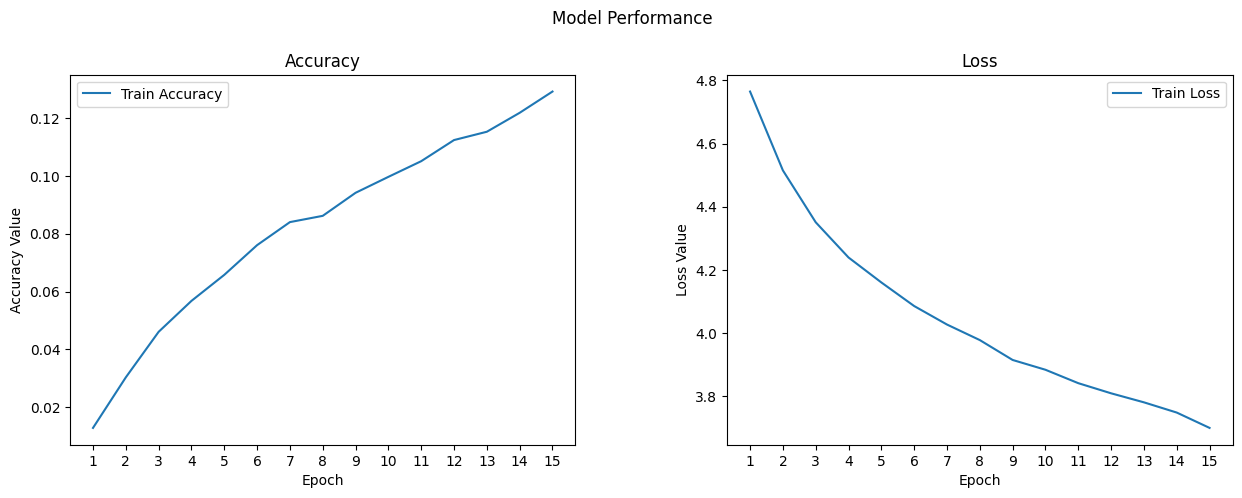

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
t = f.suptitle('Model Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)


epochs = list(range(1,16))
ax1.plot(epochs, history.history['accuracy'], label='Train Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epochs, history.history['loss'], label='Train Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [18]:
# Exemplo de como fazer uma predição com uma imagem:

img_path = r'teste_real\rhodesian_ridgeback1.jpg'  
img = image.load_img(img_path, target_size=(64, 64))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img /= 255

prediction = model.predict(img)
predicted_breed_index = np.argmax(prediction)


1/1 [==============================] - 0s 34ms/step


A raça prevista é: n02111129-Leonberg


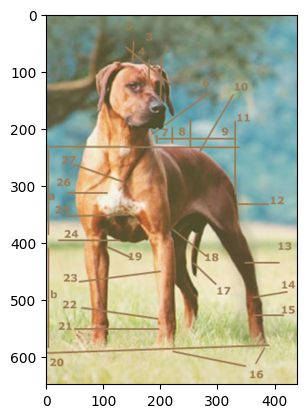

In [19]:
breed_list = train_set.class_indices
predicted_breed = [breed for breed, index in breed_list.items() if index == predicted_breed_index][0]

img_show = plt.imread(r'teste_real\rhodesian_ridgeback1.jpg')
plt.imshow(img_show)
print(f'A raça prevista é: {predicted_breed}')